In [3]:
# Comparing RO to INS data

import sys
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts")
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts/config")
from figs import plot
import motion

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

import module
import settings

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16 #32
plt.rcParams['xtick.labelsize'] = 16 #24
plt.rcParams['ytick.labelsize'] = 16 #24
plt.rcParams['legend.fontsize'] = 16 #32
plt.rcParams['text.usetex'] = True
# text
plt.rc("font", family=settings.FONT_FAMILY)

module.set_sys_paths()

from mrg.logging import MonolithicDecoder
from mrg.adaptors.transform import PbSerialisedTransformToPython
from mrg.transform.conversions import se3_to_components, build_se3_transform

import numpy as np
from config.data import *

In [4]:
# INS_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/ground-truth/flattened_novatel_generated_poses.monolithic"
# RO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/standard-ro/radar_motion_estimation.monolithic"
# ERO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/enhanced-ro/radar_motion_estimation.monolithic"

dataset_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/" \
               "2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/"
INS_relative_poses_path = dataset_path+"motion_estimation/ground-truth/flattened_novatel_generated_poses.monolithic"
RO_relative_poses_path = dataset_path+"motion_estimation/standard-ro/radar_motion_estimation.monolithic"
# ERO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/motion_estimation/enhanced-ro/radar_motion_estimation.monolithic"
ERO_relative_poses_path = dataset_path+"motion_estimation/enhanced-ro/kalman_radar_motion_estimation.monolithic"

# INS_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-07-27-15-35-23-long-hanbourgh-to-ori/motion_estimation/ground-truth/flattened_novatel_generated_poses.monolithic"
# RO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-07-27-15-35-23-long-hanbourgh-to-ori/motion_estimation/standard-ro/radar_motion_estimation.monolithic"
# ERO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-07-27-15-35-23-long-hanbourgh-to-ori/motion_estimation/enhanced-ro/no_reachback_radar_motion_estimation.monolithic"


# INS - open monolithic and iterate frames
print("reading INS_relative_poses_path: " + INS_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    INS_relative_poses_path)

# iterate mono
INS_se3s = []
INS_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    INS_se3s.append(serialised_transform[0])
    INS_timestamps.append(serialised_transform[1])
    
# RO - open monolithic and iterate frames
print("reading RO_relative_poses_path: " + RO_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    RO_relative_poses_path)

# iterate mono
RO_se3s = []
RO_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    RO_se3s.append(serialised_transform[0])
    RO_timestamps.append(serialised_transform[1])
    
# ERO - open monolithic and iterate frames
print("reading ERO_relative_poses_path: " + ERO_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    ERO_relative_poses_path)
# iterate mono
ERO_se3s = []
ERO_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    ERO_se3s.append(serialised_transform[0])
    ERO_timestamps.append(serialised_transform[1])

reading INS_relative_poses_path: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/motion_estimation/ground-truth/flattened_novatel_generated_poses.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading RO_relative_poses_path: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/motion_estimation/standard-ro/radar_motion_estimation.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading ERO_relative_poses_path: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/motion_estimation/enhanced-ro/kalman_radar_motion_estimation.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2


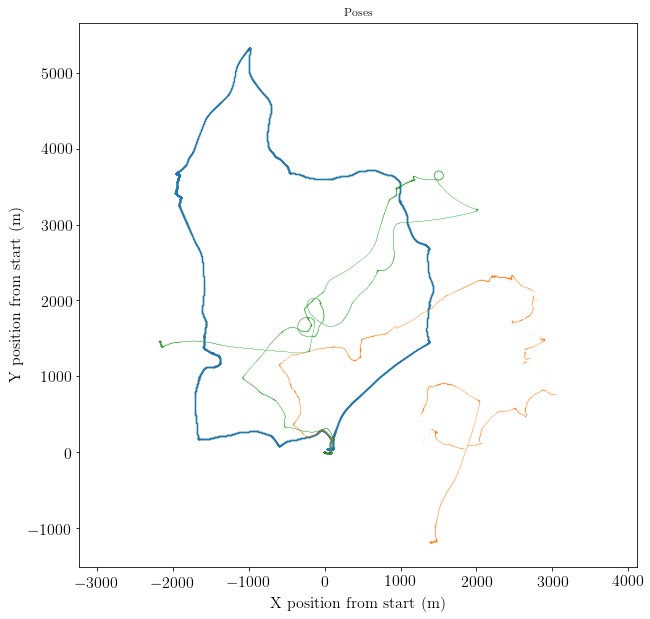

In [5]:
# get INS poses
INS_poses = []
pose = np.identity(4)
for i in range(len(INS_se3s)):
    pose = pose * INS_se3s[i]
    INS_poses.append(pose)

# get x,y coords
x_INS = [pose[0, 3] for pose in INS_poses]
y_INS = [pose[1, 3] for pose in INS_poses]

# get RO poses
RO_poses = []
pose = np.identity(4)
for i in range(len(RO_se3s)):
    pose = pose * RO_se3s[i]
    RO_poses.append(pose)

# get x,y coords
x_RO = [pose[0, 3] for pose in RO_poses]
y_RO = [pose[1, 3] for pose in RO_poses]

# get ERO poses
ERO_poses = []
pose = np.identity(4)
for i in range(len(ERO_se3s)):
    pose = pose * ERO_se3s[i]
    ERO_poses.append(pose)

# get x,y coords
x_ERO = [pose[0, 3] for pose in ERO_poses]
y_ERO = [pose[1, 3] for pose in ERO_poses]

plt.figure(figsize=(10,10))
plt.plot(x_INS,y_INS,'.',markersize=0.1);
plt.plot(x_RO,y_RO,'.',markersize=0.1);
plt.plot(x_ERO,y_ERO,'.',markersize=0.1);
plt.axis('equal');
plt.title('Poses');
plt.xlabel('X position from start (m)');
plt.ylabel('Y position from start (m)');

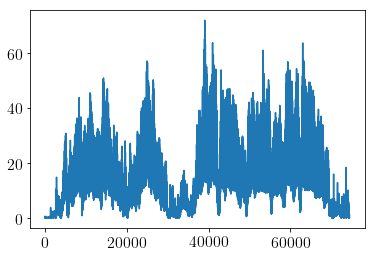

In [6]:
# get INS speeds
assert len(INS_se3s) == len(INS_timestamps)
INS_speeds = []
INS_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(INS_timestamps) - 1):
# for i in range(0,len(timestamps) - 1,10): # this fixed the glitches by skipping them
# for i in range(1000,2000):
    # work out speed
    delta_time = INS_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - INS_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = INS_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    INS_speeds.append(speed)
    INS_TIMESTAMPS.append(INS_timestamps[i])
plt.plot(INS_speeds);

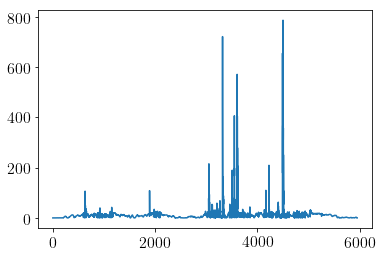

In [7]:
# get speeds
assert len(RO_se3s) == len(RO_timestamps)
RO_speeds = []
RO_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(RO_timestamps) - 1):
# for i in range(0,len(timestamps) - 1,10): # this fixed the glitches by skipping them
# for i in range(1000,2000):
    # work out speed
    delta_time = RO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - RO_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = RO_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    RO_speeds.append(speed)
    RO_TIMESTAMPS.append(RO_timestamps[i])
plt.plot(RO_speeds);

/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


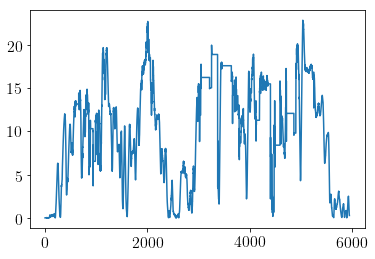

In [8]:
# get speeds
assert len(ERO_se3s) == len(ERO_timestamps)
ERO_speeds = []
ERO_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(ERO_timestamps) - 1):
# for i in range(0,len(timestamps) - 1,10): # this fixed the glitches by skipping them
# for i in range(1000,2000):
    # work out speed
    delta_time = ERO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - ERO_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = ERO_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    ERO_speeds.append(speed)
    ERO_TIMESTAMPS.append(ERO_timestamps[i])
plt.plot(ERO_speeds);

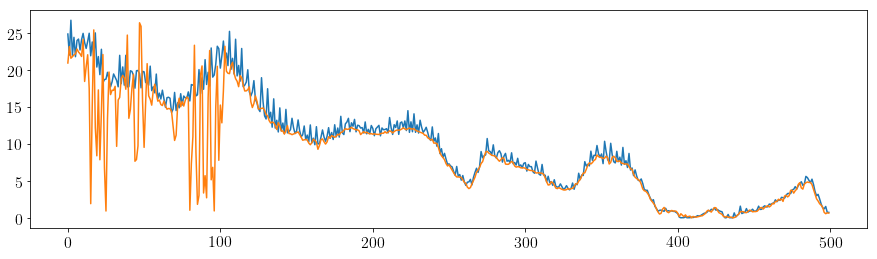

In [9]:
# Do interpolation (accumulatation for now)
interp_INS_speed = []
distance = 0
temp_speed = 0
j = 0
for i in range(len(RO_timestamps)):
    while(INS_timestamps[j] < RO_timestamps[i]):
        distance += INS_speeds[j]*(INS_timestamps[j]-INS_timestamps[j-1])
        j+=1
    temp_speed = distance/(RO_timestamps[i]-RO_timestamps[i-1])
    interp_INS_speed.append(temp_speed)
    distance = 0
plt.figure(figsize=(15,4))
plt.plot(interp_INS_speed[2000:2500])
plt.plot(RO_speeds[2000:2500])

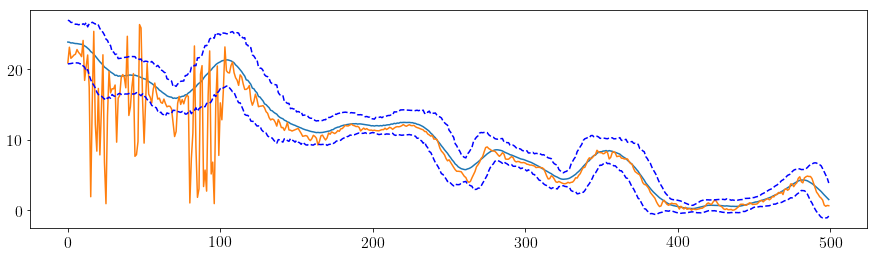

In [10]:
window_size = 20
std_devs = []
means = []
n_sigmas = 2
for i in range(window_size//2,len(interp_INS_speed)-window_size//2):
    window_contents = interp_INS_speed[i-window_size//2:i+window_size//2]
    std_devs.append(std(window_contents))
    means.append(mean(window_contents))
    
means = np.array(means)
means[-window_size//2:] = 0
means = np.roll(means,window_size//2)

std_devs = np.array(std_devs)
std_devs[-window_size//2:] = 0
std_devs = np.roll(std_devs,window_size//2)

plt.figure(figsize=(15,4))
plt.plot(means[2000:2500])
plt.plot(RO_speeds[2000:2500])
plt.plot(means[2000:2500]+n_sigmas*std_devs[2000:2500],'b--')
plt.plot(means[2000:2500]-n_sigmas*std_devs[2000:2500],'b--')
# plt.plot(means[2000:2500])
# plt.plot(RO_speeds[2005:2505])
# plt.plot(means[2000:2500]+n_sigmas*std_devs[2000:2500],'b--')
# plt.plot(means[2000:2500]-n_sigmas*std_devs[2000:2500],'b--')

(-5, 100)

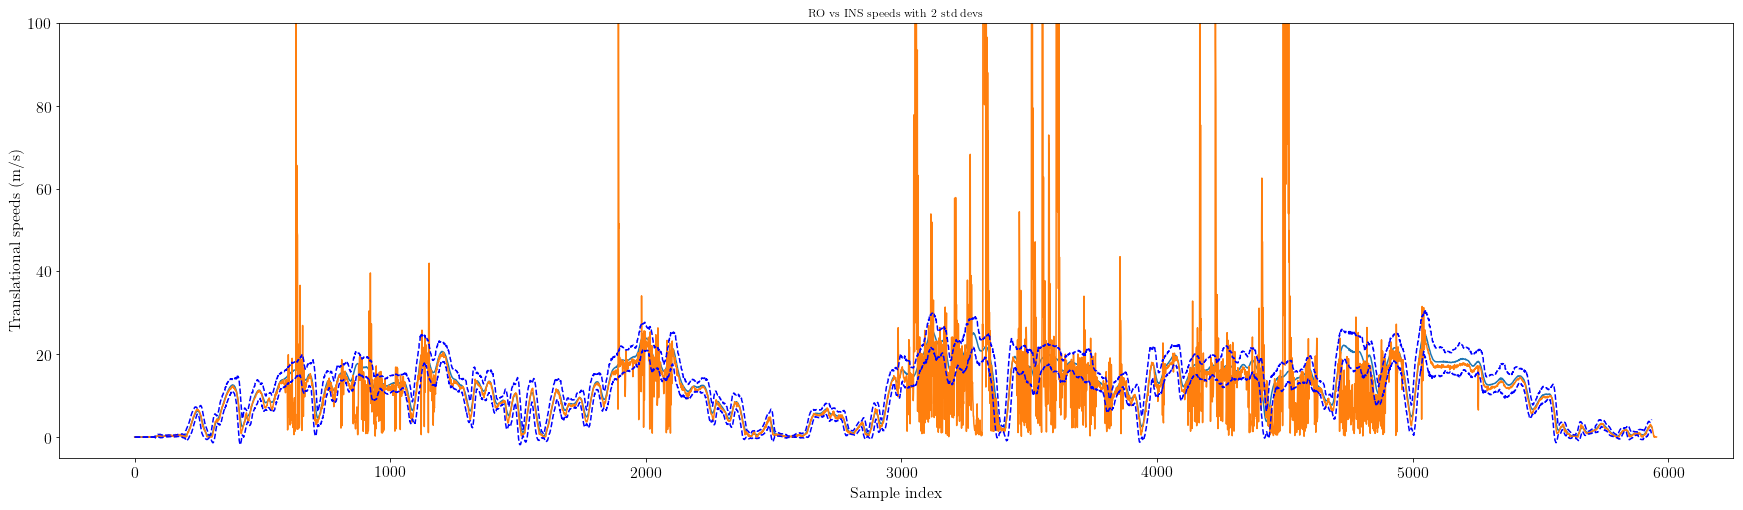

In [11]:
plt.figure(figsize=(30,8))
plt.title('RO vs INS speeds with 2 std devs')
plt.ylabel('Translational speeds (m/s)')
plt.xlabel('Sample index')
plt.plot(means)
plt.plot(RO_speeds)
plt.plot(means+n_sigmas*std_devs,'b--')
plt.plot(means-n_sigmas*std_devs,'b--')
# plt.plot(means+3*std_devs,'k--')
# plt.plot(means-3*std_devs,'k--')
plt.ylim(-5,100)

In [12]:
# Checking for failures based on speeds (not accelerations)
m = len(means)
upper_thresh = means + n_sigmas*std_devs
lower_thresh = means - n_sigmas*std_devs
minimum_speed_to_label = 0.5
label_reach_back = 0
classification = ones(m)*-1
for i in range(m):
    if(RO_speeds[i] < lower_thresh[i]) or RO_speeds[i] > upper_thresh[i]:
        if(means[i] > minimum_speed_to_label):
            classification[i-label_reach_back:i+1] = 1;
#     else:
#         classification[i+window_size//2,] = -1;

In [13]:
tmp_arr = ones(10)
rb = 1
tmp_arr[3-rb:3+1] = 9
print(tmp_arr)

[1. 1. 9. 9. 1. 1. 1. 1. 1. 1.]


array([   2.245609,    2.495891,    2.745568, ..., 1480.143009,
       1480.391622, 1480.642188])

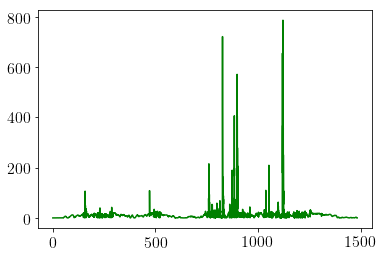

In [14]:
t_ro = np.array([x - RO_TIMESTAMPS[0] for x in RO_TIMESTAMPS])
t_ro = t_ro/1e6
t_ins = t_ro[9:-10]
plt.plot(t_ro,RO_speeds,'g-',markersize=0.5)
t_ins

Detected failures: 1265 of 5936 samples


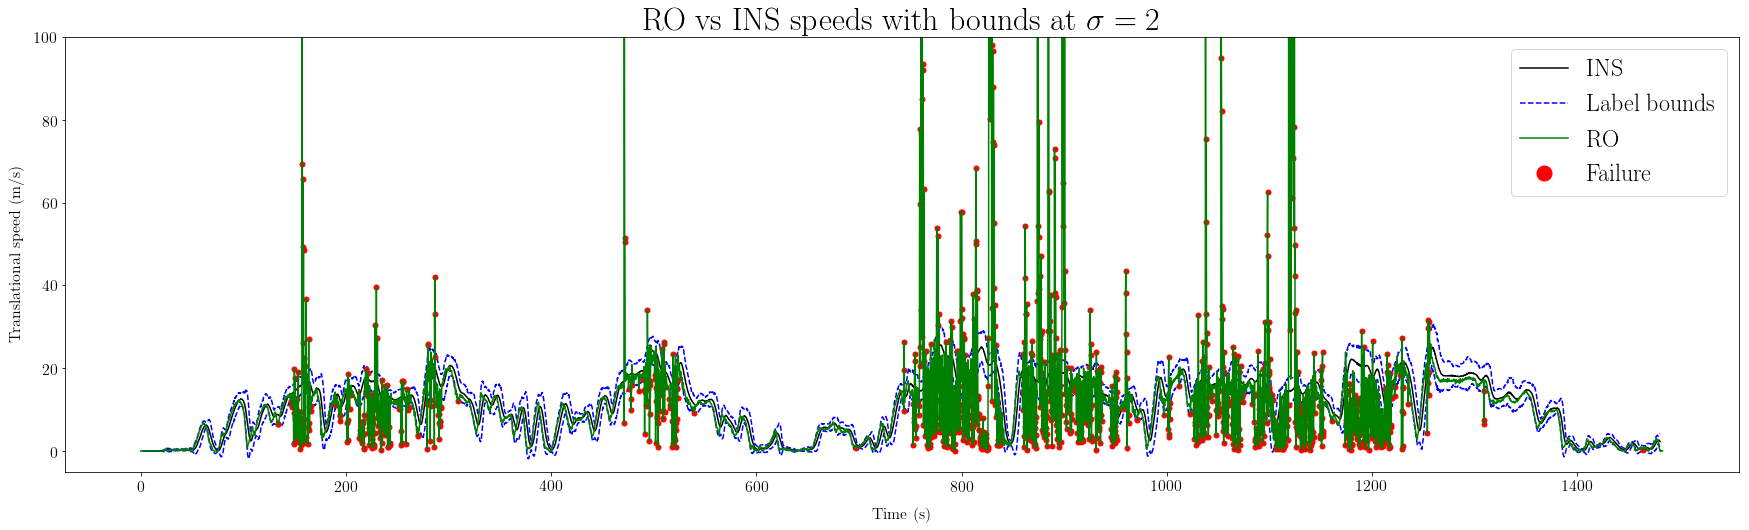

In [15]:
plt.figure(figsize=(30,8))
plt.title('RO vs INS speeds with bounds at $\sigma = 2$',fontsize=32)
plt.ylabel('Translational speed (m/s)',labelpad=10)
plt.xlabel('Time (s)',labelpad=10)
plt.plot(t_ins,means,'k')
plt.plot(t_ins,means+n_sigmas*std_devs,'b--')
plt.plot(t_ins,means-n_sigmas*std_devs,'b--')
for i in range(m):
    if(classification[i] == 1):
        plt.plot(t_ro[i],RO_speeds[i],'r.-',markersize=10)
#     else:
plt.plot(t_ro,RO_speeds,'g-',markersize=0.5) 
plt.ylim(-5,100)

line1, = plt.plot([],[],color='black',label='INS')
line2, = plt.plot([],[],'b--',label='Label bounds')
line3, = plt.plot([],[],color='green',label='RO')
line4, = plt.plot([],[],'r.',label='Failure',markersize=30)
plt.legend(handles=[line1,line2,line3,line4],fontsize=24)

# plt.savefig("/Users/roberto/data/fig1.pdf",bbox_inches='tight',pad_inches = 0)

tally = 0;
for i in range(m):
    if(classification[i] == 1):
        tally+=1
print('Detected failures:',tally,"of",m,'samples')

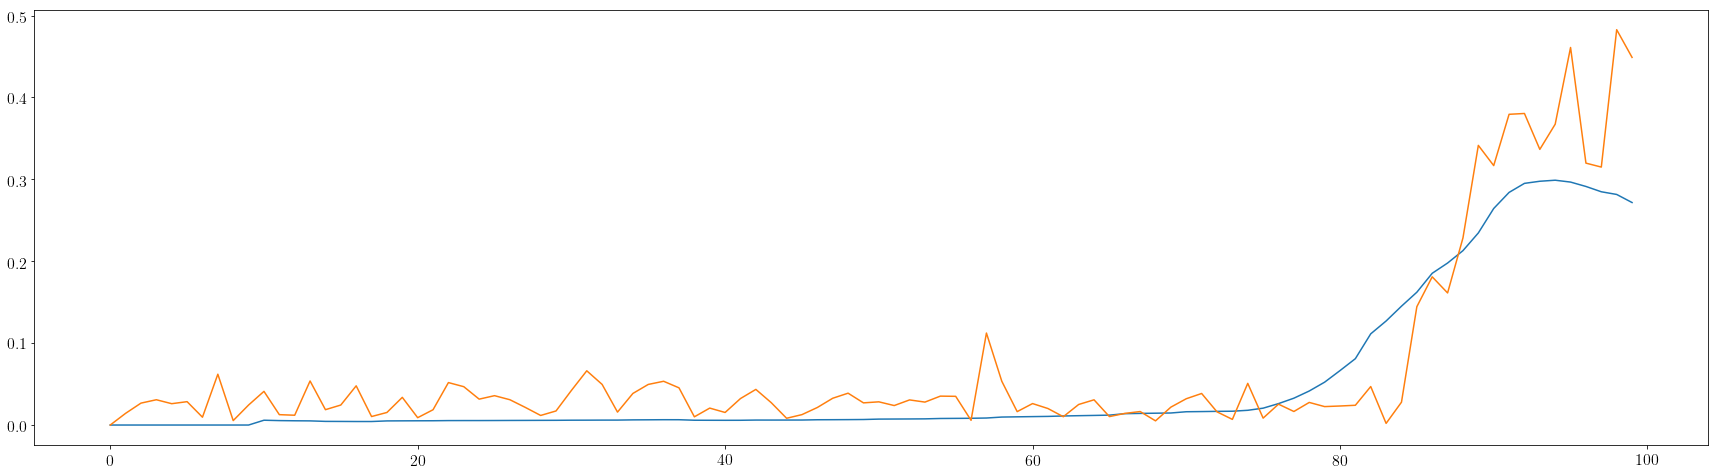

In [16]:
plt.figure(figsize=(30,8))
t1 = 0
t2 = 100
baseline_still = means[t1:t2]
RO_still = RO_speeds[t1:t2]
plt.plot(baseline_still)
plt.plot(RO_still)

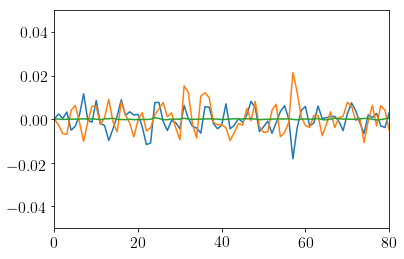

In [55]:

x = np.array([x[0, 3] for x in RO_se3s])
y = np.array([y[1, 3] for y in RO_se3s])
theta = np.array([math.atan2(theta[1, 0],theta[0, 0]) for theta in RO_se3s])
plt.plot(x)
plt.plot(y)
plt.plot(theta)
limits = 0.05
t1, t2 = 0, 80
plt.ylim([-limits, limits])
plt.xlim([t1, t2])

# a = np.c_[A, B].T
tmp = np.cov(np.c_[x[t1:t2],y[t1:t2],theta[t1:t2]].T)

In [56]:
np.sqrt(tmp)

/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[0.00515381,        nan, 0.00046804],
       [       nan, 0.00640304, 0.00026414],
       [0.00046804, 0.00026414, 0.00018925]])

In [57]:
1e-4 * 180 / np.pi

0.005729577951308233

In [58]:
tmp

array([[ 2.65617849e-05, -1.38615852e-06,  2.19064610e-07],
       [-1.38615852e-06,  4.09989682e-05,  6.97714082e-08],
       [ 2.19064610e-07,  6.97714082e-08,  3.58148063e-08]])

(0, 2000)

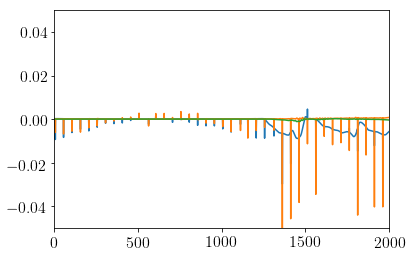

In [62]:
x = np.array([x[0, 3] for x in INS_se3s])
y = np.array([y[1, 3] for y in INS_se3s])
theta = np.array([math.atan2(theta[1, 0],theta[0, 0]) for theta in INS_se3s])
plt.plot(x)
plt.plot(y)
plt.plot(theta)
limits = 0.05
t1, t2 = 0, 2000
plt.ylim([-limits, limits])
plt.xlim([t1, t2])

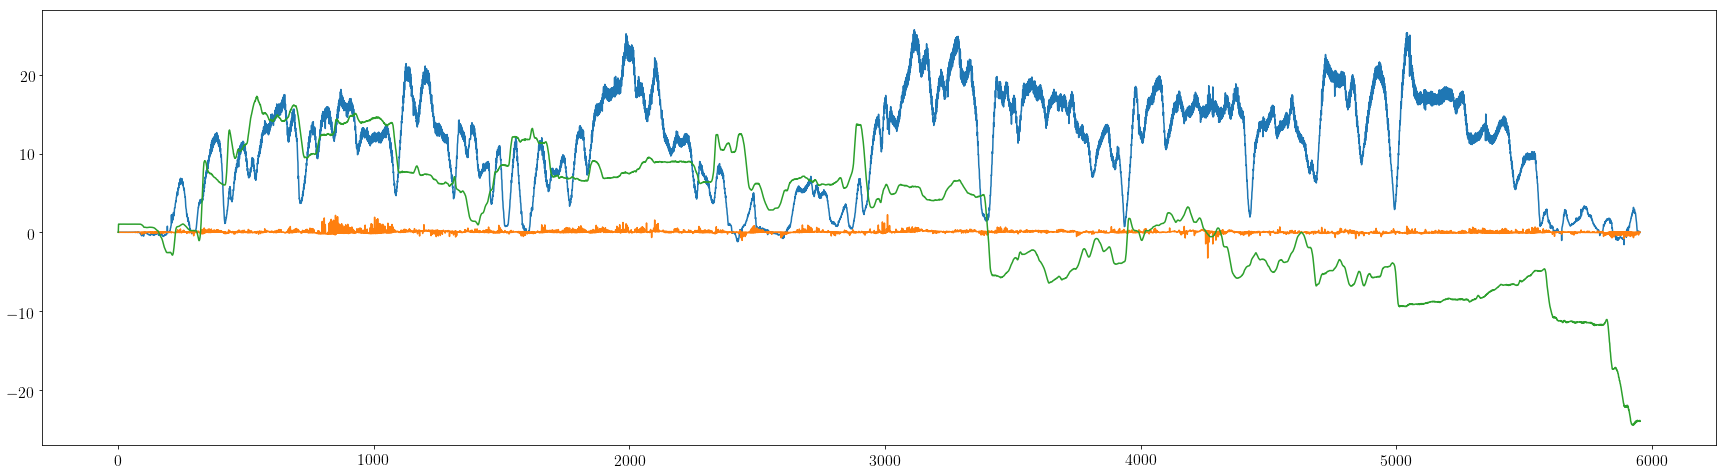

In [97]:
# get INS speeds
assert len(INS_se3s) == len(INS_timestamps)
INS_x = []
INS_y = []
INS_theta = []
INS_dx = []
INS_dy = []
INS_dtheta = []
INS_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(INS_timestamps) - 1):
    # work out speed
    delta_time = INS_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - INS_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    INS_x.append(INS_se3s[i][0,3])
    INS_y.append(INS_se3s[i][1,3])
    INS_theta.append(math.atan2(INS_se3s[i][1, 0],INS_se3s[i][0, 0]))

INS_x = np.array(INS_x)
INS_dx = INS_x / delta_time
INS_y = np.array(INS_y)
INS_dy = INS_y / delta_time
INS_theta = np.array(INS_theta)
INS_dtheta = INS_theta / delta_time

# Do interpolation (accumulatation for now)
interp_INS_dx = []
distance = 0
temp_speed = 0
j = 0
for i in range(len(RO_timestamps)):
    while(INS_timestamps[j] < RO_timestamps[i]):
        distance += INS_dx[j]*(INS_timestamps[j]-INS_timestamps[j-1])
        j+=1
    temp_speed = distance/(RO_timestamps[i]-RO_timestamps[i-1])
    interp_INS_dx.append(temp_speed)
    distance = 0

interp_INS_dy = []
distance = 0
temp_speed = 0
j = 0
for i in range(len(RO_timestamps)):
    while(INS_timestamps[j] < RO_timestamps[i]):
        distance += INS_dy[j]*(INS_timestamps[j]-INS_timestamps[j-1])
        j+=1
    temp_speed = distance/(RO_timestamps[i]-RO_timestamps[i-1])
    interp_INS_dy.append(temp_speed)
    distance = 0
    
interp_INS_dtheta = []
difference = 0
temp_speed = 0
j = 0
for i in range(len(RO_timestamps)):
    while(INS_timestamps[j] < RO_timestamps[i]):
        difference += INS_dtheta[j]*(INS_timestamps[j]-INS_timestamps[j-1])
        j+=1
    temp_speed = difference/(RO_timestamps[i]-RO_timestamps[i-1])
    interp_INS_dtheta.append(temp_speed)
    distance = 0

plt.figure(figsize=(30,8))
plt.plot(interp_INS_dx)    
plt.plot(interp_INS_dy)
plt.plot(interp_INS_dtheta)
# plt.xlim([1000,1200])


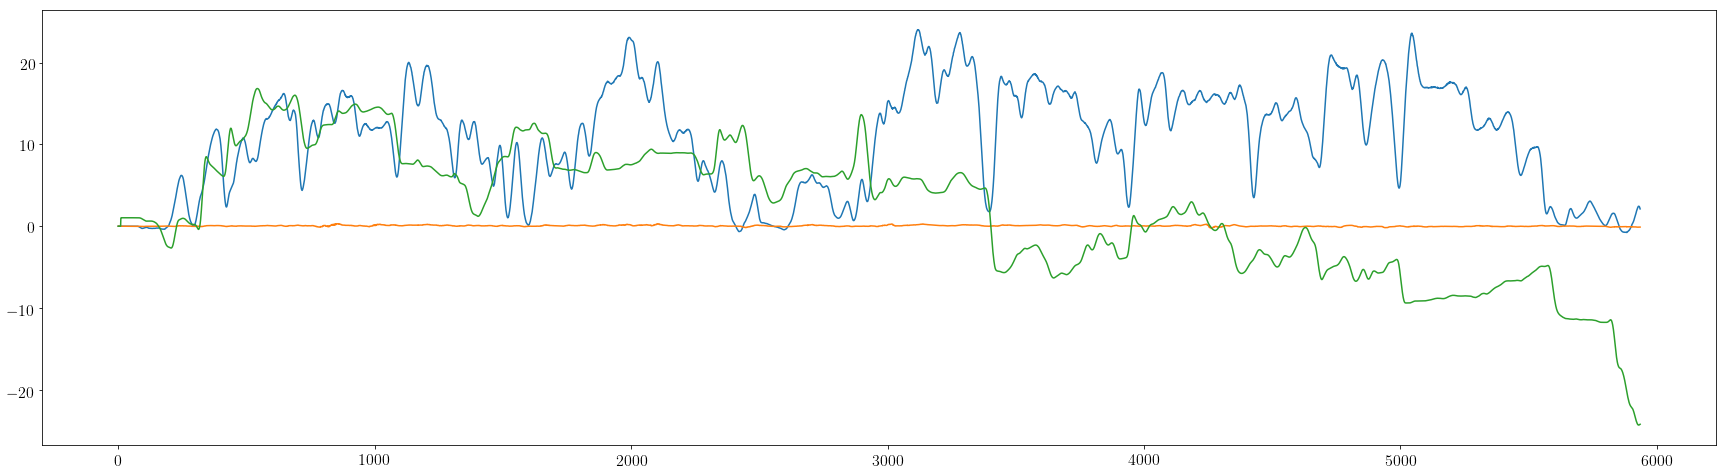

In [101]:
window_size = 20
n_sigmas = 2
# X values
std_devs_x = []
means_x = []

for i in range(window_size//2,len(interp_INS_dx)-window_size//2):
    window_contents = interp_INS_dx[i-window_size//2:i+window_size//2]
#     std_devs_x.append(std(window_contents))
    means_x.append(mean(window_contents))
    
means_x = np.array(means_x)
means_x[-window_size//2:] = 0
means_x = np.roll(means_x,window_size//2)

# std_devs_x = np.array(std_devs_x)
# std_devs_x[-window_size//2:] = 0
# std_devs_x = np.roll(std_devs_x,window_size//2)

# Y values
std_devs_y = []
means_y = []

for i in range(window_size//2,len(interp_INS_dy)-window_size//2):
    window_contents = interp_INS_dy[i-window_size//2:i+window_size//2]
#     std_devs_y.append(std(window_contents))
    means_y.append(mean(window_contents))
    
means_y = np.array(means_y)
means_y[-window_size//2:] = 0
means_y = np.roll(means_y,window_size//2)

# std_devs_y = np.array(std_devs_y)
# std_devs_y[-window_size//2:] = 0
# std_devs_y = np.roll(std_devs_y,window_size//2)

# Theta values
std_devs_theta = []
means_theta = []

for i in range(window_size//2,len(interp_INS_dtheta)-window_size//2):
    window_contents = interp_INS_dtheta[i-window_size//2:i+window_size//2]
#     std_devs_theta.append(std(window_contents))
    means_theta.append(mean(window_contents))
    
means_theta = np.array(means_theta)
means_theta[-window_size//2:] = 0
means_theta = np.roll(means_theta,window_size//2)

# std_devs_theta = np.array(std_devs_theta)
# std_devs_theta[-window_size//2:] = 0
# std_devs_theta = np.roll(std_devs_theta,window_size//2)

plt.figure(figsize=(30,8))

plt.plot(means_x)
plt.plot(means_y)
plt.plot(means_theta)

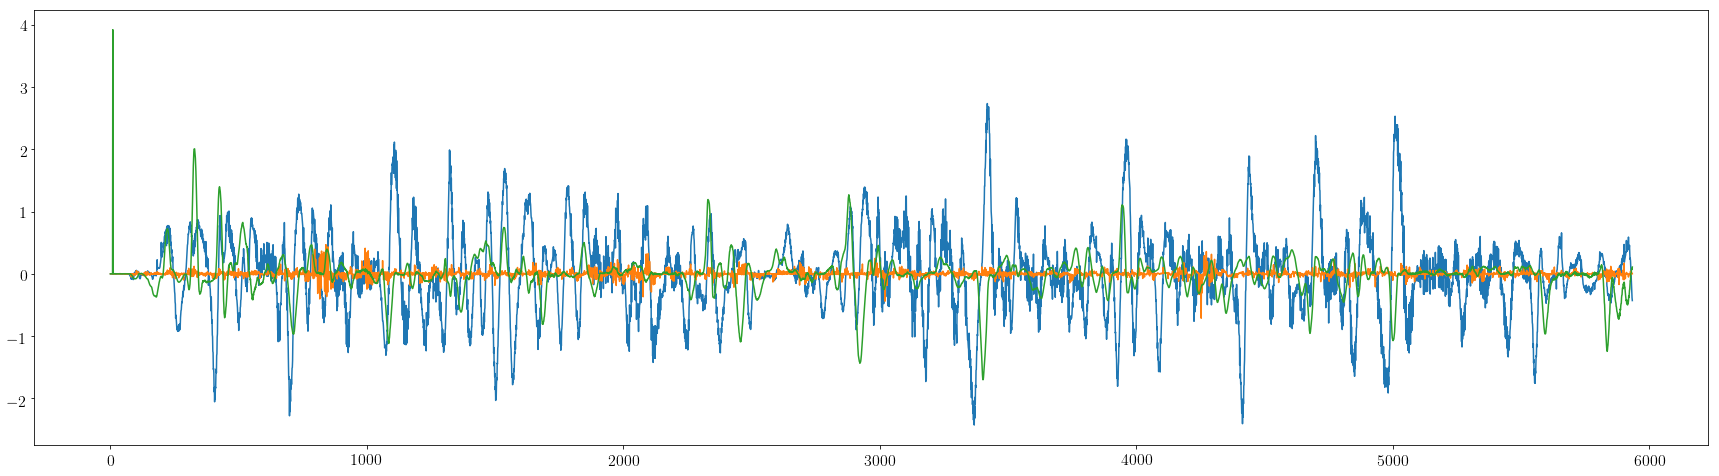

In [147]:
acc_x = diff(means_x)/0.25
acc_y = diff(means_y)/0.25
acc_theta = diff(means_theta)/0.25

std_devs_acc_x = std(acc_x)
std_devs_acc_y = std(acc_y)
std_devs_acc_theta = std(acc_theta)

plt.figure(figsize=(30,8))
plt.plot(acc_x)
plt.plot(acc_y)
plt.plot(acc_theta)

In [154]:
R = np.zeros((6,6))
t = 0.25
R[0,0] = ((t**4)/4)*std_devs_acc_x**2
R[1,1] = ((t**4)/4)*std_devs_acc_y**2
R[2,2] = ((t**4)/4)*std_devs_acc_theta**2
R[3,3] = (t**2)*std_devs_acc_x**2
R[4,4] = (t**2)*std_devs_acc_y**2
R[5,5] = (t**2)*std_devs_acc_theta**2

R[0,2] = ((t**3)/2)*std_devs_acc_x**2
R[2,0] = ((t**3)/2)*std_devs_acc_x**2
R[3,5] = ((t**3)/2)*std_devs_acc_y**2
R[5,3] = ((t**3)/2)*std_devs_acc_y**2

In [156]:
R

array([[4.23655194e-04, 0.00000000e+00, 3.38924155e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.01030716e-06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.38924155e-03, 0.00000000e+00, 9.48084693e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.71139324e-02,
        0.00000000e+00, 1.60824573e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.28659658e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.60824573e-05,
        0.00000000e+00, 6.06774204e-03]])

In [151]:
std_devs_acc_theta

0.311582850266763

In [158]:
R.diagonal()

array([4.23655194e-04, 2.01030716e-06, 9.48084693e-05, 2.71139324e-02,
       1.28659658e-04, 6.06774204e-03])